### About Dataset
### Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
Inspiration
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Tasks to Solve :
To predict which customer is more likely to purchase the newly introduced travel package
Which variables are most significant.
Which segment of customers should be targeted more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\Users\tusha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\tusha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

### Handling missing values
1. Handling missing values
2. Handling Duplicate
3. check data type
4. Understand the dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
### check all categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('single', 'Unmarried')

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
## check missing values
## theese are the features with nan values

features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5) , ' % missing values')

Age 4.62357  % missing values
TypeofContact 0.51146  % missing values
DurationOfPitch 5.13502  % missing values
NumberOfFollowups 0.92062  % missing values
PreferredPropertyStar 0.53191  % missing values
NumberOfTrips 2.86416  % missing values
NumberOfChildrenVisiting 1.35025  % missing values
MonthlyIncome 4.76678  % missing values


### Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for Preferred PropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildren Visiting
8. Impute Median for MonthlyIncome

In [11]:
df.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [12]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

# df.TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)# mode() returns a series with the first most frequent value

# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)


In [13]:
df.isnull().sum()   

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID', inplace=True, axis=1)

## Feature extraction

In [15]:
# crete a new feature TotalVisiting by adding NumberOfChildrenVisiting and NumberOfPersonVisiting
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)

In [16]:
# get all the numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_features))

Number of numerical features:  12


In [17]:
# get all the categorical features
num_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features: ', len(num_features))

Number of categorical features:  6


In [18]:
## descrete feature
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  6


In [19]:
# continuous features
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Number of continuous features: ', len(continuous_features))

Number of continuous features:  0


In [20]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0


### tran test split and model traning

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [22]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [23]:
X.head(5)

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [24]:
# seperate data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape

((3421, 17), (1467, 17))

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [26]:
# create Colmn transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns    # exclude object type columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer #can combine multiple feature extraction mechanisms into a single transformer

numeric_transformers = StandardScaler()
oh_trnasformer = OneHotEncoder(drop='first')# drop first column to avoid dummy variable trap - if r g b = drop r if g =0 , b =0  then automatically r = 1

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_trnasformer, cat_features),
        ('StandardScaler', numeric_transformers, num_features)
    ]
)

In [27]:
## applying transformer on X_train - apply fit_transform
X_train = preprocessor.fit_transform(X_train)

In [28]:
X_train

array([[ 1.        ,  0.        ,  1.        , ..., -1.28447803,
         1.12077211, -0.79365988],
       [ 1.        ,  0.        ,  0.        , ..., -1.28447803,
        -0.11138261,  0.62193472],
       [ 1.        ,  0.        ,  1.        , ..., -1.28447803,
         0.73194429, -0.08586258],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.28447803,
        -0.22519996, -0.79365988],
       [ 0.        ,  0.        ,  0.        , ..., -1.28447803,
        -0.48480367,  0.62193472],
       [ 0.        ,  0.        ,  1.        , ...,  0.77852636,
        -1.14093858,  0.62193472]])

In [29]:
# apply transform on X_test - using transform
X_test = preprocessor.transform(X_test)

In [42]:
## train the model - random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [43]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)# Terain the model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set peformance

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(f"Model: {list(models.keys())[i]}")

    print("Training set performance")
    print(f"Accuracy: {model_train_accuracy}")
    print(f"Precision: {model_train_precision}")
    print(f"Recall: {model_train_recall}")
    print(f"F1 Score: {model_train_f1}")
    print(f"ROC AUC Score: {model_train_rocauc_score}")
    print("  ")
    print("Test set performance")
    print(f"Accuracy: {model_test_accuracy}")
    print(f"Precision: {model_test_precision}")
    print(f"Recall: {model_test_recall}")
    print(f"F1 Score: {model_test_f1}")
    print(f"ROC AUC Score: {model_test_rocauc_score}")
    print("  ")



Model: Logistic Regression
Training set performance
Accuracy: 0.8427360420929553
Precision: 0.7098765432098766
Recall: 0.34124629080118696
F1 Score: 0.8198690042007661
ROC AUC Score: 0.6535135713197782
  
Test set performance
Accuracy: 0.8561690524880708
Precision: 0.6223776223776224
Recall: 0.3617886178861789
F1 Score: 0.8400376941352954
ROC AUC Score: 0.6587812868300673
  
Model: Decision Tree
Training set performance
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
  
Test set performance
Accuracy: 0.8827539195637355
Precision: 0.6267123287671232
Recall: 0.7439024390243902
F1 Score: 0.886640814389501
ROC AUC Score: 0.8273156748766505
  
Model: Random Forest
Training set performance
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
  
Test set performance
Accuracy: 0.9277436946148603
Precision: 0.9375
Recall: 0.6097560975609756
F1 Score: 0.9213199763762048
ROC AUC Score: 0.8007830446854839
  


In [44]:
# hyperparameter tuningq
rf_param = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto",8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100,200,500,1000]
}

In [46]:
## Models List for Hyperparamter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_param)
]

In [47]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=param,
                                n_iter=100,
                                cv=3,
                                verbose = 2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------------- Best Params for {model_name} -------------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------------- Best Params for RF -------------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [49]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth= None)
}

In [50]:

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)# Terain the model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set peformance

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(f"Model: {list(models.keys())[i]}")

    print("Training set performance")
    print(f"Accuracy: {model_train_accuracy}")
    print(f"Precision: {model_train_precision}")
    print(f"Recall: {model_train_recall}")
    print(f"F1 Score: {model_train_f1}")
    print(f"ROC AUC Score: {model_train_rocauc_score}")
    print("  ")
    print("Test set performance")
    print(f"Accuracy: {model_test_accuracy}")
    print(f"Precision: {model_test_precision}")
    print(f"Recall: {model_test_recall}")
    print(f"F1 Score: {model_test_f1}")
    print(f"ROC AUC Score: {model_test_rocauc_score}")
    print("  ")


Model: Random Forest
Training set performance
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
  
Test set performance
Accuracy: 0.9325153374233128
Precision: 0.9106145251396648
Recall: 0.6626016260162602
F1 Score: 0.9280970088338784
ROC AUC Score: 0.8247488064561236
  


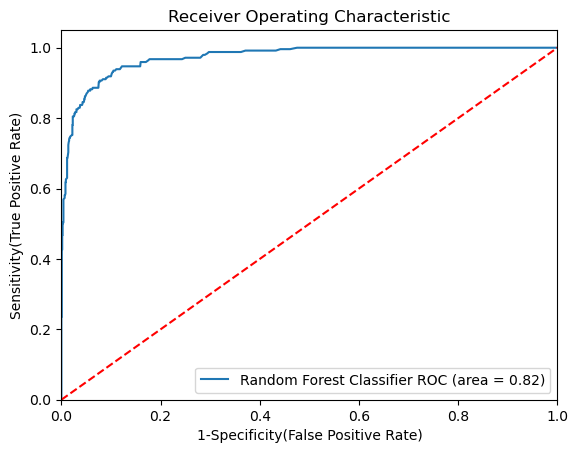

In [51]:
## Plot ROC AUC crve

from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth= None),
    'auc': 0.824
    }
]

# create loop for each model
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('auc.png')
plt.show()